<a href="https://colab.research.google.com/github/LuisPalmaBugler/Kaggle/blob/master/Santander_Costumer_NE_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
random.seed(1234)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import ThresholdedReLU
from keras.utils import to_categorical
from keras.optimizers import SGD

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Santander/train.csv')

In [3]:
train_1 = train.loc[train["target"] == 1]
train_1.shape

(20098, 202)

In [4]:
train_0 = train.loc[train["target"] == 0]
train_0.shape

(179902, 202)

In [5]:
train_1d = train_1.drop(["target","ID_code"], axis=1)
train_0d = train_0.drop(["target","ID_code"], axis=1)

In [6]:
train_1d = normalize(train_1d, norm = 'max', axis = 0)
train_0d = normalize(train_0d, norm = 'max', axis = 0)

In [7]:
train_1d_std = train_1d.std(axis=0)
train_1d_std = pd.DataFrame(train_1d_std)
train_0d_std = train_0d.std(axis=0)
train_0d_std = pd.DataFrame(train_0d_std)

In [8]:
X_trainset_0d, X_testset_0d, y_trainset_0d, y_testset_0d = train_test_split(train_0d, train_0["target"] , test_size=0.25, random_state=1234)

In [9]:
X_testset_0d = pd.DataFrame(X_testset_0d)
train_f = train.loc[X_testset_0d.index, :]
train_F = train_f.append(train_1)

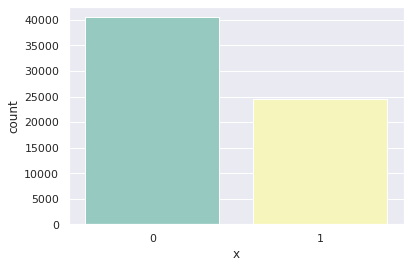

In [10]:
train_yx_0 = pd.DataFrame(train_F["target"])
train_yx_0["x"] = train_F["target"]
sns.countplot(train_yx_0["x"], palette='Set3')

In [11]:
train_Fn = train_F.drop(["target","ID_code"], axis=1)
train_Fn = normalize(train_Fn, norm = 'max', axis = 0)
train_Fn = pd.DataFrame(train_Fn)

In [12]:
X_trainset_v, X_validset, y_trainset_v, y_validset = train_test_split(train_Fn, train_F["target"] , test_size=0.1, random_state=1234)

In [13]:
classifiers = []
ConfustionMx = []
C = 1.0
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_trainset_v, y_trainset_v, test_size=0.10, random_state = 1)
LR = LogisticRegression(C = C, solver='newton-cg', max_iter=200, penalty = 'l2', class_weight = 'balanced').fit(X_trainset,y_trainset)
cv_results_train = cross_validate(LR, X_trainset, y_trainset, cv=4)
cv_results_test = cross_validate(LR, X_testset, y_testset, cv=4)
classifiers.append((cv_results_train['test_score'],cv_results_test['test_score'], C))
print(classifiers)
z_trainset = LR.predict(X_trainset)
z_testset= LR.predict(X_testset)
tn_n, fp_n, fn_n, tp_n = confusion_matrix(y_trainset, z_trainset, labels=[1,0]).ravel()
tn_t, fp_t, fn_t, tp_t = confusion_matrix(y_testset, z_testset, labels=[1,0]).ravel()
ConfustionMx.append((tn_n, tn_t, fp_n,fp_t, fn_n, fn_t, tp_n, tp_t))
print(ConfustionMx)

[(array([0.78077098, 0.77278591, 0.78500417, 0.7721788 ]), array([0.75836177, 0.76912568, 0.74521858, 0.77117486]), 1.0)]
[(15447, 1747, 4384, 511, 7200, 802, 25678, 2797)]


In [17]:
y_validset = pd.DataFrame(y_validset)

In [18]:
y_hat_validset = LR.predict(X_validset)
y_hat_val = pd.DataFrame(y_hat_validset)

In [19]:
confusion_matrix(y_validset, y_hat_val, labels=[1,0]).ravel()

array([1915,  555,  896, 3142])

In [ ]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Santander/test.csv')

In [ ]:
test_s = test.drop(["ID_code"], axis=1)
test_sn = normalize(test_s, norm = 'max', axis = 0)
test_sn = pd.DataFrame(test_sn)

In [ ]:
z_hat_test = LR.predict(test_sn)

In [ ]:
test_s["z"] = z_hat_test

In [ ]:
SS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Santander/sample_submission.csv')

In [ ]:
SS.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [ ]:
SS = SS.join(test_s["z"])

In [ ]:
SS.head(20)

In [ ]:
SS['y'] = SS["z"].fillna(0)

In [ ]:
SS['y'] = SS['y'].astype('int')

In [ ]:
SS = SS.drop(["target"], axis=1)

In [ ]:
SS.head(20)

In [ ]:
SS['target'] = SS['z']

In [ ]:
SS = SS.drop(["z"], axis=1)

In [ ]:
SS.head()

,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,0
3,test_3,1
4,test_4,1


In [ ]:
SS_1 = SS.loc[SS["target"] == 1]
SS_1.shape

(69523, 2)

In [ ]:
SS_0 = SS.loc[SS["target"] == 0]
SS_0.shape

(130477, 2)

In [ ]:
SS.to_csv('sample_submission_NE_LR.csv', index=False)